# Libraries

In [1]:
import snap
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from collections import Counter

# Problem 1

## Load graph

In [2]:
data_path = 'data/wiki-Vote.txt'
G = snap.LoadEdgeList(snap.PNGraph, data_path, 0, 1)

## Problem 1.1

In [3]:
print(G.GetNodes())

7115


## Problem 1.2

In [4]:
NodesWithSelfLoop = {
    E.GetSrcNId() 
    for E in G.Edges() 
    if E.GetSrcNId() == E.GetDstNId()
}
print(len(NodesWithSelfLoop))

0


## Problem 1.3

In [5]:
DirectedEdges = {
    (E.GetSrcNId(), E.GetDstNId()) 
    for E in G.Edges() 
    if E.GetSrcNId() != E.GetDstNId()
}
print(len(DirectedEdges))

103689


## Problem 1.4

In [6]:
UndirectedEdges = { 
    (E.GetSrcNId(), E.GetDstNId()) 
    for E in G.Edges() 
    if G.IsEdge(E.GetDstNId(), E.GetSrcNId()) 
}
print(len(UndirectedEdges))

5854


## Problem 1.5

In [7]:
ReciprocatedEdges = { 
    (E.GetSrcNId(), E.GetDstNId()) 
    for E in G.Edges() 
    if G.IsEdge(E.GetDstNId(), E.GetSrcNId()) 
       and E.GetSrcNId() != E.GetDstNId()
}
print(len(UndirectedEdges))

5854


## Problem 1.6

In [8]:
ZeroOutDegNodes = {
    N.GetId()
    for N in G.Nodes()
    if N.GetOutDeg() == 0
}
print(len(ZeroOutDegNodes))

1005


## Problem 1.7

In [9]:
ZeroOutDegNodes = {
    N.GetId()
    for N in G.Nodes()
    if N.GetInDeg() == 0
}
print(len(ZeroOutDegNodes))

4734


## Problem 1.8

In [10]:
MoreThan10OutDegNodes = {
    N.GetId()
    for N in G.Nodes()
    if N.GetOutDeg() > 10
}
print(len(MoreThan10OutDegNodes))

1612


## Problem 1.9

In [11]:
FewerThan10InDegNodes = {
    N.GetId()
    for N in G.Nodes()
    if N.GetInDeg() < 10
}
print(len(FewerThan10InDegNodes))

5165


# Problem 2

## Problem 2.1

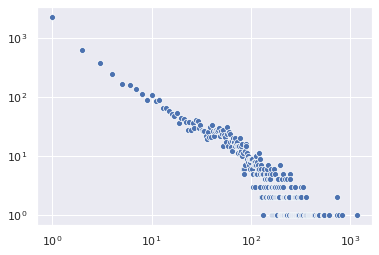

In [12]:
X, Y = [], []

DegToCntV = snap.TIntPrV()
snap.GetDegCnt(G, DegToCntV)
for item in DegToCntV:
    cnt = item.GetVal2()
    deg = item.GetVal1()
    if deg > 0 and cnt > 0:
        X.append(deg)
        Y.append(cnt)
X, Y = map(np.array, [X, Y])

fig, ax = plt.subplots()
ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
sns.scatterplot(X, Y)

## Problem 2.2

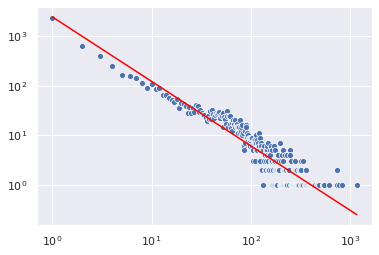

In [13]:
a, b = np.polyfit(np.log10(X), np.log10(Y), 1)
lineX = np.arange(X.min() - 1, X.max() + 1, 1)
lineY = (10**b) * (lineX**a)

fig, ax = plt.subplots()
ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
sns.scatterplot(X, Y)
sns.lineplot(lineX, lineY, color='red')

# Problem 3

## Load Graph

In [14]:
data_path = 'data/stackoverflow-Java.txt'
G = snap.LoadEdgeList(snap.PNEANet, data_path, 0, 1)

## Problem 3.1

In [15]:
Cs = snap.TCnComV()
snap.GetWccs(G, Cs)
print(len(Cs))

10143


## Problem 3.2

In [16]:
MxWcc = snap.GetMxWcc(G)
print(MxWcc.GetEdges(), MxWcc.GetNodes())

347297 131188


## Problem 3.3

In [17]:
PRankH = snap.TIntFltH()
snap.GetPageRank(G, PRankH)
PRankH = sorted([(PRankH[k], k) for k in PRankH], reverse=True)
print(PRankH[:3])

[(0.014487640265633013, 992484), (0.009713897354211635, 135152), (0.0075449138999974545, 139985)]


## Problem 3.4

In [18]:
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(G, NIdHubH, NIdAuthH)

NIdHubH = sorted([(NIdHubH[k], k) for k in NIdHubH], reverse=True)
NIdAuthH = sorted([(NIdAuthH[k], k) for k in NIdAuthH], reverse=True)

print(NIdHubH[:3])
print(NIdAuthH[:3])

[(0.25893819769439114, 614141), (0.17952104555814175, 240337), (0.16955401992174304, 100516)]
[(0.7990595928120374, 157882), (0.312252491402458, 22656), (0.21661194242000273, 203907)]
